<a href="https://colab.research.google.com/github/sumugowda/Tensorflow_tutorial/blob/main/Tensorflow_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

# Tensor Demo

In [2]:
x = tf.constant(10.0)
y = tf.constant(15.0)
z = x+y
print(z)

tf.Tensor(25.0, shape=(), dtype=float32)


# Define tensorflow Variables


In [4]:
#Assume Linear Model y = w*x+b
#define model parameters
w = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)

#Define model input and output
x = tf.Variable([5.0], tf.float32)
y = w*x+b

print("w:", w)
print("x:", x)
print("b:", b)
print("y:", y)

w: <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.3], dtype=float32)>
x: <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([5.], dtype=float32)>
b: <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.3], dtype=float32)>
y: tf.Tensor([1.2], shape=(1,), dtype=float32)


# Linear model in tensorflow

In [6]:
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167, 7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]

train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221, 2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]


NUM_EXAMPLES = len(train_X)



#create model paramters with initial values
W = tf.Variable(0.)

b = tf.Variable(0.)


#training info
train_steps = 100
learning_rate = 0.01

for i in range(train_steps):

  #watch the gradient flow
  with tf.GradientTape() as tape:

    #forward pass
    yhat = train_X * W +b

    #calculate the Loss (difference squared error)
    error = yhat - train_Y
    loss = tf.reduce_mean(tf.square(error))

  #evaluate the gradient with the respect to the parameters
  dW, db = tape.gradient(loss, [W, b])

  #update the parameters using Gradient Descent
  W.assign_sub(dW * learning_rate)
  b.assign_add(db* learning_rate)

  #print the Loss every 20 iteration
  if i % 20 == 0:
    print("Loss at step {:03d}: {:.3f}".format(i, loss))
  print(f'W : {W.numpy()} , b = {b.numpy()} ')

Loss at step 000: 6.100
W : 0.32237356901168823 , b = -0.04732470586895943 
W : 0.36513468623161316 , b = -0.05543460696935654 
W : 0.37103503942489624 , b = -0.05837952718138695 
W : 0.3720766603946686 , b = -0.06064827740192413 
W : 0.3724783957004547 , b = -0.06283263862133026 
W : 0.3727964758872986 , b = -0.06501063704490662 
W : 0.37310418486595154 , b = -0.06719256937503815 
W : 0.3734112083911896 , b = -0.06937980651855469 
W : 0.373718798160553 , b = -0.07157254219055176 
W : 0.3740271329879761 , b = -0.07377080619335175 
W : 0.37433627247810364 , b = -0.07597462832927704 
W : 0.3746461868286133 , b = -0.07818401604890823 
W : 0.374956876039505 , b = -0.08039898425340652 
W : 0.3752683401107788 , b = -0.08261954039335251 
W : 0.3755805790424347 , b = -0.08484570682048798 
W : 0.37589362263679504 , b = -0.08707749843597412 
W : 0.37620747089385986 , b = -0.08931492269039154 
W : 0.37652209401130676 , b = -0.09155800193548203 
W : 0.37683749198913574 , b = -0.09380674362182617 


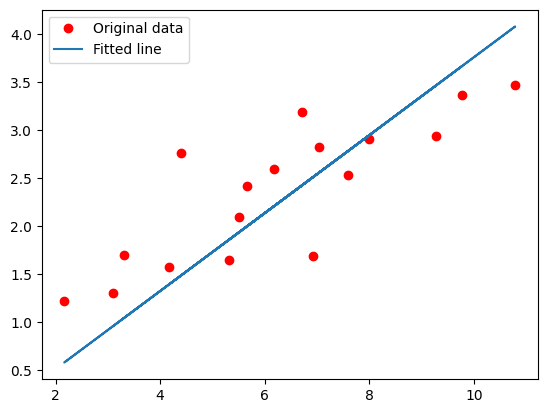

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()

# TensorFlow 2 MNIST Demo

Step 0: Load TensorFlow:


In [9]:
import tensorflow as tf

Step 1: Load MNIST dataset and convert same to floating point numbers from integers:

In [11]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Step 2: Build the model, choose an optimizer and the loss function:

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

Step 3: Take a look at what the model is doing in terms of outputs - vectors:

In [13]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.11039054,  0.20751585, -0.68420106,  0.5677315 , -0.4134785 ,
        -0.35317028, -0.44309184, -0.10167119,  0.9263735 , -0.6986789 ]],
      dtype=float32)

Step 4: We need the probability of each class instead of the vectors:

In [14]:
tf.nn.softmax(predictions).numpy()

array([[0.10587136, 0.11667008, 0.04782905, 0.16726272, 0.06269964,
        0.0665973 , 0.06087012, 0.08564091, 0.23941723, 0.04714157]],
      dtype=float32)

Step 5:Finding the scalar loss for each example:

In [15]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [16]:
loss_fn(y_train[:1], predictions).numpy()

2.7090912

Step 6:Model compilation:

In [17]:
model.compile(optimizer= 'adam',
              loss=loss_fn,
              metrics=['accuracy'])

Step 7:Model fitting to minimize the loss:

In [19]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0656 - accuracy: 0.9791
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0573 - accuracy: 0.9815
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0535 - accuracy: 0.9821
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0490 - accuracy: 0.9843
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0436 - accuracy: 0.9856
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0422 - accuracy: 0.9860
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0389 - accuracy: 0.9868
Epoch 8/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0370 - accuracy: 0.9872
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0339 - accuracy: 0.9881
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.032

Step 8:Model evaluation

In [20]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0721 - accuracy: 0.9817 - 950ms/epoch - 3ms/step


[0.0720774382352829, 0.9817000031471252]